# Assignment 1  
## Comprehensive Study of Linear Regression Models (Manual Implementation)

This notebook performs regression analysis **without using any ML library**.
Models implemented manually:
- Simple Linear Regression
- Multiple Linear Regression
- Polynomial Regression
- Ridge Regression
- Lasso Regression


In [1]:
#Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Data Show
data = pd.read_csv("dataset.csv")
print(data.head())
print(data.info())

   Feature1  Feature2  Feature3  Target
0        48        99        76   336.5
1        37        57        63   280.5
2        27        21        43   166.5
3        36        72         9   168.0
4        29        64        43   188.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    int64  
 1   Feature2  100 non-null    int64  
 2   Feature3  100 non-null    int64  
 3   Target    100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None


         Feature1    Feature2    Feature3      Target
count  100.000000  100.000000  100.000000  100.000000
mean    25.800000   53.930000   39.310000  183.035000
std     13.711309   27.018608   20.210356   60.682368
min      1.000000   10.000000    5.000000   37.000000
25%     15.750000   30.750000   22.000000  139.625000
50%     26.000000   52.500000   37.000000  178.750000
75%     38.250000   76.500000   56.500000  217.375000
max     50.000000  100.000000   80.000000  336.500000
Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64
          Feature1  Feature2  Feature3    Target
Feature1  1.000000  0.097902 -0.013553  0.681713
Feature2  0.097902  1.000000  0.024828  0.290938
Feature3 -0.013553  0.024828  1.000000  0.664111
Target    0.681713  0.290938  0.664111  1.000000


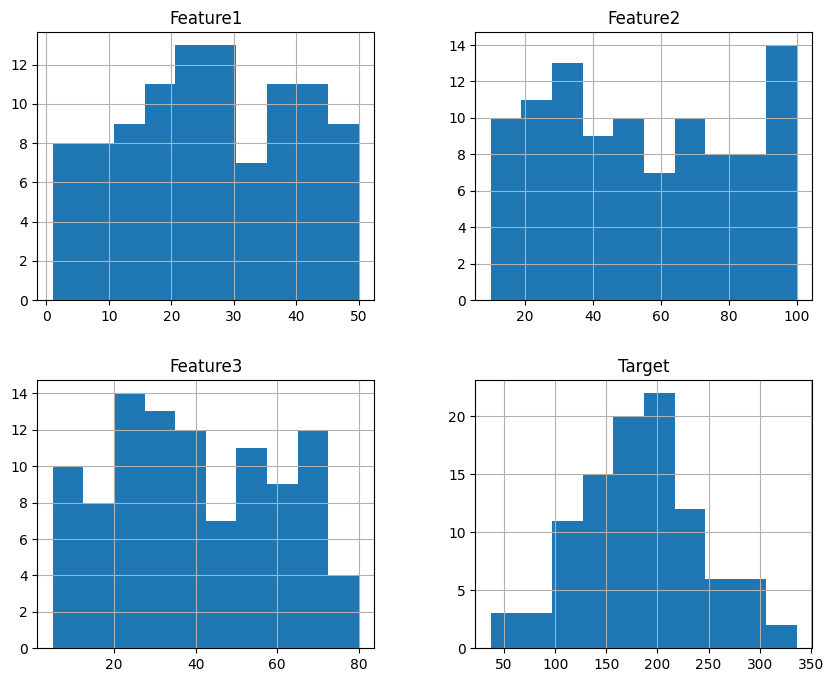

In [3]:
#Data Describe and show
print(data.describe())
print(data.isnull().sum())
print(data.corr())

data.hist(figsize=(10,8))
plt.show()


===== SIMPLE LINEAR REGRESSION =====
Slope: 3.0170696324951645
Intercept: 105.19460348162475


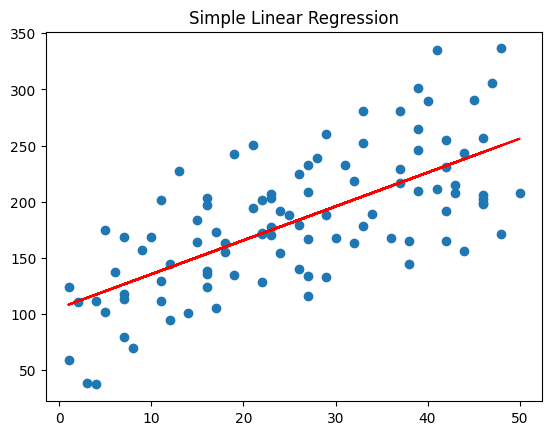

In [4]:
#Simple Linear Regression
print("\n===== SIMPLE LINEAR REGRESSION =====")

x = data['Feature1'].values
y = data['Target'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

b1 = np.sum((x-x_mean)*(y-y_mean)) / np.sum((x-x_mean)**2)
b0 = y_mean - b1*x_mean

print("Slope:", b1)
print("Intercept:", b0)

y_pred_simple = b0 + b1*x

plt.scatter(x,y)
plt.plot(x,y_pred_simple,color='red')
plt.title("Simple Linear Regression")
plt.show()

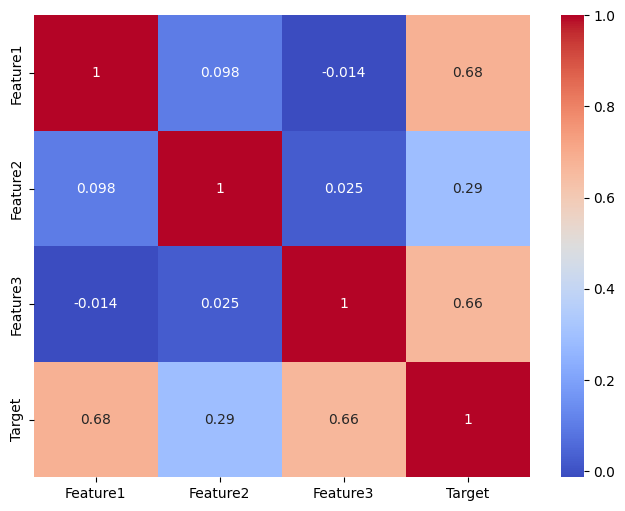

In [12]:
# STEP — Correlation Heatmap

import seaborn as sns   # add this line if not already imported

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')   # use your dataframe name
plt.show()

In [5]:
#Multiple Linear Regression
print("\n===== MULTIPLE LINEAR REGRESSION =====")

X = data[['Feature1','Feature2','Feature3']].values
y = data['Target'].values

X_b = np.c_[np.ones((len(X),1)), X]

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Coefficients:", theta)

y_pred = X_b.dot(theta)

def mse(y, pred):
    return np.mean((y-pred)**2)

def rmse(y, pred):
    return np.sqrt(mse(y,pred))

def r2(y,pred):
    ss_total = np.sum((y-np.mean(y))**2)
    ss_res = np.sum((y-pred)**2)
    return 1 - ss_res/ss_total

print("MSE:", mse(y,y_pred))
print("RMSE:", rmse(y,y_pred))
print("R2:", r2(y,y_pred))


===== MULTIPLE LINEAR REGRESSION =====
Coefficients: [2.36698195 2.96669923 0.468787   2.00573632]
MSE: 140.95244461578355
RMSE: 11.872339475258595
R2: 0.9613355016579098


In [6]:
#Polynomial Regression
print("\n===== POLYNOMIAL REGRESSION =====")

x_poly = data['Feature1'].values
X_poly = np.c_[np.ones(len(x_poly)), x_poly, x_poly**2]

theta_poly = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
y_pred_poly = X_poly.dot(theta_poly)

print("Polynomial R2:", r2(y,y_pred_poly))


===== POLYNOMIAL REGRESSION =====
Polynomial R2: 0.48268180506597247


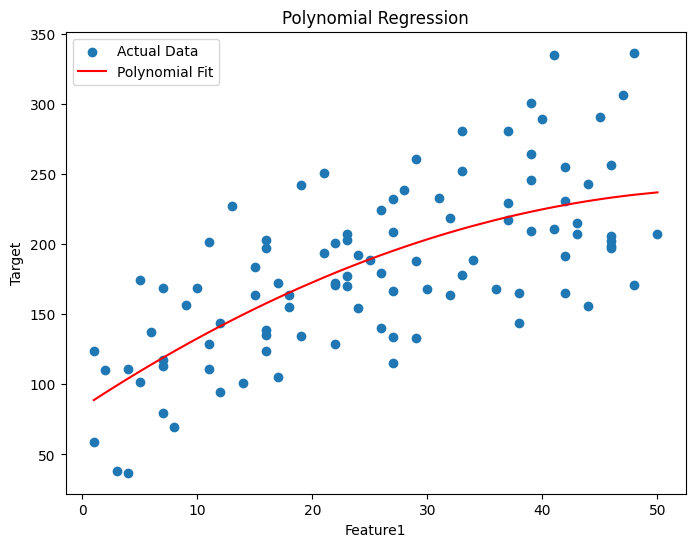

In [15]:
# Polynomial Regression Plot

plt.figure(figsize=(8,6))

# actual data
plt.scatter(x_poly, y, label="Actual Data")

# sort values for smooth curve
sorted_index = np.argsort(x_poly)
x_sorted = x_poly[sorted_index]
y_sorted = y_pred_poly[sorted_index]

# polynomial curve
plt.plot(x_sorted, y_sorted, color='red', label="Polynomial Fit")

plt.title("Polynomial Regression")
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.legend()

plt.show()


In [21]:
# Ridge Regression
print("\n===== RIDGE REGRESSION =====")

lam = 1

I = np.eye(X_b.shape[1])
I[0,0] = 0   # do NOT regularize bias term

theta_ridge = np.linalg.inv(X_b.T.dot(X_b) + lam*I).dot(X_b.T).dot(y)

print("Ridge coefficients:", theta_ridge)

# create predictions
y_pred_ridge = X_b.dot(theta_ridge)

# evaluate using your custom functions
evaluate(y, y_pred_ridge, "Ridge")



===== RIDGE REGRESSION =====
Ridge coefficients: [2.3730114  2.96653835 0.46878946 2.00568516]

Ridge Performance
MSE : 140.9524504030846
RMSE: 11.872339718989034
R2  : 0.9613355000704021


In [20]:
# Lasso Regression
print("\n===== LASSO REGRESSION =====")

theta_lasso = np.zeros(X_b.shape[1])
lr = 0.0001
lam = 0.1

for _ in range(1000):
    pred = X_b.dot(theta_lasso)
    error = pred - y
    grad = X_b.T.dot(error) / len(y)

    theta_lasso -= lr * (grad + lam * np.sign(theta_lasso))

print("Lasso coefficients:", theta_lasso)

# IMPORTANT: create predictions
y_pred_lasso = X_b.dot(theta_lasso)

# evaluate
evaluate(y, y_pred_lasso, "Lasso")



===== LASSO REGRESSION =====
Lasso coefficients: [0.06228342 2.99173896 0.48198432 2.02473516]

Lasso Performance
MSE : 141.40793671059131
RMSE: 11.891506915046188
R2  : 0.96121055616021


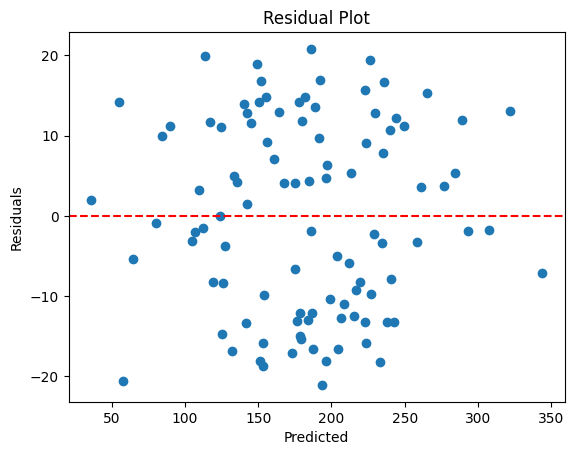

In [10]:
#Plot Show
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [16]:
print("Original Beta:\n", theta)
print("Ridge Beta:\n", theta_ridge)
print("Lasso Beta:\n", theta_lasso)

Original Beta:
 [2.36698195 2.96669923 0.468787   2.00573632]
Ridge Beta:
 [2.1251851  2.96925237 0.4702025  2.0077291 ]
Lasso Beta:
 [0.06228342 2.99173896 0.48198432 2.02473516]


In [22]:
def evaluate(y_true, y_pred, name="Model"):
    print(f"\n{name} Performance")
    print("MSE :", mse(y_true, y_pred))
    print("RMSE:", rmse(y_true, y_pred))
    print("R2  :", r2(y_true, y_pred))
evaluate(y, y_pred, "Multiple Linear")
evaluate(y, y_pred_poly, "Polynomial")
evaluate(y, y_pred_ridge, "Ridge")
evaluate(y, y_pred_lasso, "Lasso")


Multiple Linear Performance
MSE : 140.95244461578355
RMSE: 11.872339475258595
R2  : 0.9613355016579098

Polynomial Performance
MSE : 1885.8970721675691
RMSE: 43.426916447838764
R2  : 0.48268180506597247

Ridge Performance
MSE : 140.9524504030846
RMSE: 11.872339718989034
R2  : 0.9613355000704021

Lasso Performance
MSE : 141.40793671059131
RMSE: 11.891506915046188
R2  : 0.96121055616021


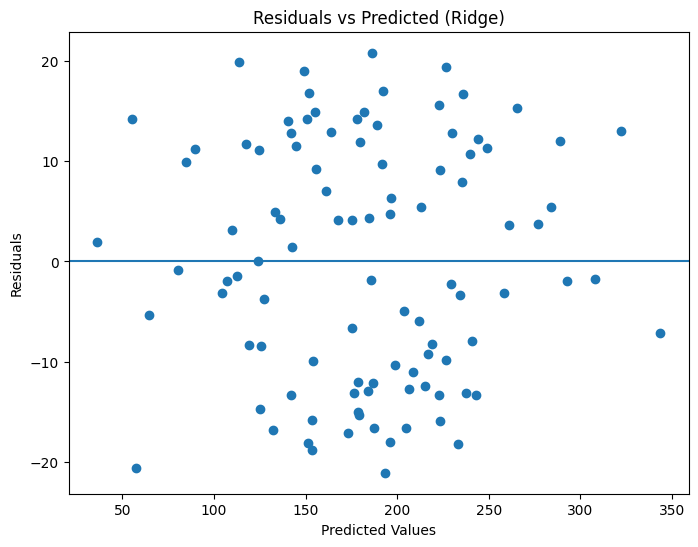

In [23]:
# Residual plot (using Ridge model)

residuals = y - y_pred_ridge

plt.figure(figsize=(8,6))
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Ridge)")
plt.show()


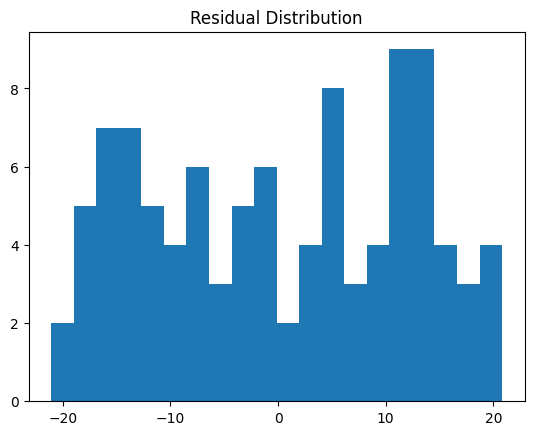

In [24]:
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()

In [25]:
print("Mean of Residuals:", np.mean(residuals))

Mean of Residuals: 8.455458555545192e-14
